<a href="https://colab.research.google.com/github/Prasad4587/DSBDL/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Accuracy Score: 0.8375

Confusion Matrix:
 [[54  2]
 [11 13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89        56
           1       0.87      0.54      0.67        24

    accuracy                           0.84        80
   macro avg       0.85      0.75      0.78        80
weighted avg       0.84      0.84      0.82        80



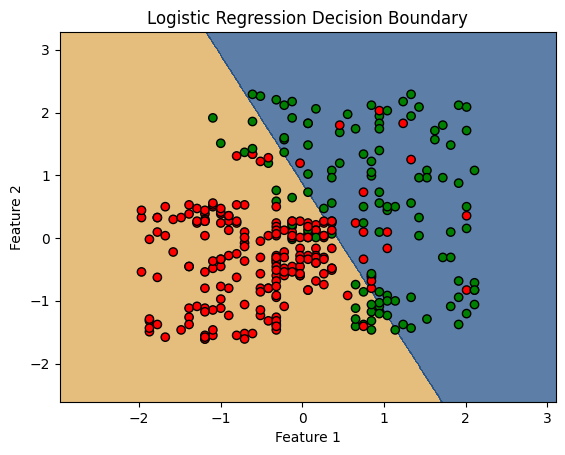

In [19]:
import numpy as np   # working on numb
import pandas as pd   # for converting data set
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression  # for logistic regression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Reading data from Social Network Csv
data = pd.read_csv("Social_Network_Ads.csv")
data.head(15)


#   Preproccess the data
 # Step 1: Selecting the feature and outcome variables
x = data[['Age','EstimatedSalary']].values
y = data['Purchased'].values

 # Step 2: Splitting the data set for traning and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)

 # Step 3: Feature Scaling for normalization of transformation
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Step 4: Train Logistic Regratssion Model
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

# Step 5: Predict the test result
y_pred = classifier.predict(x_test)

# Step 6: Model Evaluation
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Step 7: Visualize Decision Boundary
from matplotlib.colors import ListedColormap

X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('#DDA853', '#27548A')))

plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=ListedColormap(('red', 'green')), edgecolors='k')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()